## CarWise
An Intelligent Car Selection and Price Prediction System

## __Team Members__
__Priya Singh - [002951836]__
__Shiwangani Jaiswal - [002749421]__

## __Problem Statement__
__First-time car buyers face various challenges in the car-buying process due to a lack of knowledge about cars, overwhelming options, intimidating negotiation processes, and supply chain disruptions caused by the COVID-19 pandemic. These challenges make it harder for buyers to choose the right car that fits their budget and meets their needs while also getting a fair price.__


## __Goal__
__The task is to understand the factors affecting the price of cars and to identify the top brands and car categories based on the mean price.__
__The aim is to provide insights into the data that can help stakeholders such as car manufacturers, dealerships, and consumers to make informed decisions.__


## __Types of Visualisation used__
__1. Density Plot__
__2. Scatter Plot__
__3. Pair Plot__
__4. Box Plot__
__5. Bar Plot__
__6. Stacked Bar__
__7. Pie Chart__
__8. Line Chart__



# Data Dictionary:

__Feature	Description__


In [1]:
from tabulate import tabulate

# Define the data dictionary as a list of tuples
data_dict = [
    ('car_ID', 'ID number of the car', 'integer'),
    ('symboling', 'insurance risk rating', 'integer'),
    ('CarName', 'name of car manufacturer and model', 'string'),
    ('fueltype', 'fuel type i.e gas or diesel', 'string'),
    ('turbocharged', 'whether the car is turbocharged or not', 'string'),
    ('doornumber', 'number of doors', 'string'),
    ('carbody', 'body type', 'string'),
    ('drivewheel', 'drive wheel type', 'string'),
    ('enginelocation', 'engine location', 'string'),
    ('wheelbase', 'distance between the centers of the front and rear wheels', 'float'),
    ('carlength', 'length of the car', 'float'),
    ('carwidth', 'width of the car', 'float'),
    ('carheight', 'height of the car', 'float'),
    ('curbweight', 'weight of the car without occupants or baggage', 'integer'),
    ('enginetype', 'type of engine', 'string'),
    ('cylindernumber', 'number of cylinders in the engine', 'string'),
    ('enginesize', 'size of the engine in cubic centimeters', 'integer'),
    ('fuelsystem', 'type of fuel system', 'string'),
    ('boreratio', 'ratio of the cylinder bore diameter to the length of the piston stroke', 'float'),
    ('stroke', 'length of the piston stroke', 'float'),
    ('compressionratio', 'ratio of the volume of gas in the cylinder when the piston is at the bottom of its stroke to the volume when the piston is at the top of its stroke', 'float'),
    ('horsepower', 'engine power in horsepower', 'integer'),
    ('peakrpm', 'maximum engine speed in revolutions per minute', 'integer'),
    ('citympg', 'fuel efficiency in miles per gallon in city', 'integer'),
    ('highwaympg', 'fuel efficiency in miles per gallon on highway', 'integer'),
    ('avgmpg', 'average fuel efficiency in miles per gallon', 'float'),
    ('price', 'price of the car', 'float')
]

# Display the data dictionary as a table
print(tabulate(data_dict, headers=['Column Name', 'Description', 'Data Type']))


Column Name       Description                                                                                                                                          Data Type
----------------  ---------------------------------------------------------------------------------------------------------------------------------------------------  -----------
car_ID            ID number of the car                                                                                                                                 integer
symboling         insurance risk rating                                                                                                                                integer
CarName           name of car manufacturer and model                                                                                                                   string
fueltype          fuel type i.e gas or diesel                                                                           

## Data Interpretation

In [2]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

In [4]:
#returns the current working directory [getcwd()] of the Python script
import os
print(os.getcwd())

/Users/priyasingh/Desktop/Data_Visualization/Final_Project


In [5]:
# Reading the dataset
df = pd.DataFrame(pd.read_csv("Car_Feature.csv"))

In [6]:
df.head()

,car_ID,symboling,CarName,fueltype,turbocharged,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,avgmpg,price
0,1,3,alfa-romero giulia,gas,No,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,24.0,13495.0
1,2,3,alfa-romero stelvio,gas,No,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,24.0,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,No,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,22.5,16500.0
3,4,2,audi 100 ls,gas,No,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,27.0,13950.0
4,5,2,audi 100ls,gas,No,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,20.0,17450.0


## Data Evaluation
Identifying patterns, anomalies, or other characteristics relevant to the analysis

In [7]:
df.shape
# Data has 26 columns and 205 rows.

(205, 27)

In [8]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,avgmpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,27.985366,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,6.666038,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,15.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,22.500000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,27.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,32.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,51.500000,45400.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   turbocharged      205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [10]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'turbocharged',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'avgmpg', 'price'],
      dtype='object')

## Data Cleaning

In [11]:
# Map the string values to integers
df['doornumber'] = df['doornumber'].map({'two': 2, 'four': 4})
df['cylindernumber'] = df['cylindernumber'].map({'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12})

# Verify that the conversion was successful
print(df['doornumber'].unique())
print(df['cylindernumber'].unique())

[2 4]
[ 4  6  5  3 12  2  8]


In [12]:
#Checking for missing values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
turbocharged        0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
avgmpg              0
price               0
dtype: int64

In [13]:
#Checking for duplicate rows
df.duplicated().sum()

0

In [14]:
# Replacing missing values indicated by "?" with NaN
df = df.replace('?', np.nan)

# Dropping any rows with missing values
df = df.dropna()

# Converting any string columns to numeric type
df[['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']] = df[['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']].apply(pd.to_numeric)

# Removing any duplicate rows
df = df.drop_duplicates()

# Resetting the index
df = df.reset_index(drop=True)


In [15]:
df.head()

,car_ID,symboling,CarName,fueltype,turbocharged,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,avgmpg,price
0,1,3,alfa-romero giulia,gas,No,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,24.0,13495.0
1,2,3,alfa-romero stelvio,gas,No,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,24.0,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,No,2,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,22.5,16500.0
3,4,2,audi 100 ls,gas,No,4,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,27.0,13950.0
4,5,2,audi 100ls,gas,No,4,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,20.0,17450.0


# Exploratory Data Analysis ( EDA )

## __1. Fuel type Popularity__

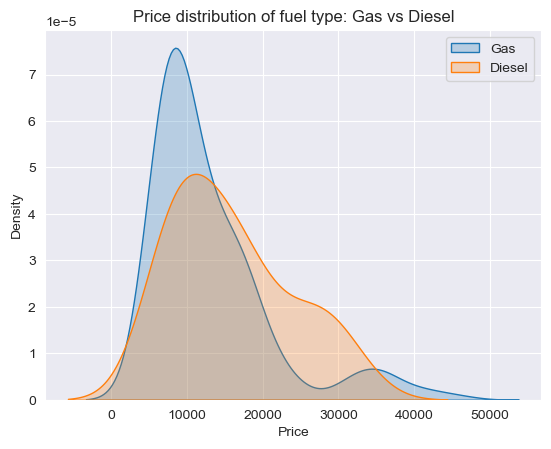

In [16]:
sns.kdeplot(df[df['fueltype'] == 'gas']['price'], shade=True, label='Gas')
sns.kdeplot(df[df['fueltype'] == 'diesel']['price'], shade=True, label='Diesel')
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Price distribution of fuel type: Gas vs Diesel')
plt.legend()
plt.show()


## __Analysis__
__More gas powered cars are available in market__
__Between 20K & 30K there are more diesel cars than gas powered cars__

## 2. __Enginesize popularity__

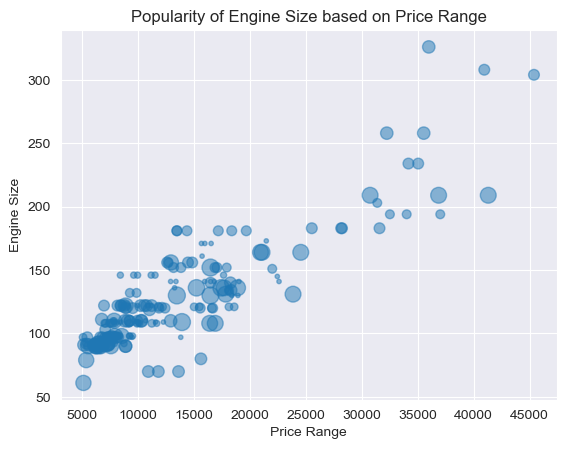

In [17]:
# Select the data for the plot
x = df['price']  # price range
y = df['enginesize']  # engine size
popularity = df['enginesize'].value_counts()  # popularity of engine size


# Create the scatter plot
plt.scatter(x, y, s=np.repeat(popularity.values, x.groupby(df['enginesize']).count())*10, alpha=0.5)

# Add labels and title
plt.xlabel('Price Range')
plt.ylabel('Engine Size')
plt.title('Popularity of Engine Size based on Price Range')

# Show the plot
plt.show()


## __Analysis__
__Based on the scatter plot, we can see that for the given dataset, engine size of 120 and 90 seem to be the most popular in this dataset__

## __3. Correlation of cylindernumber vs avgmpg vs price__

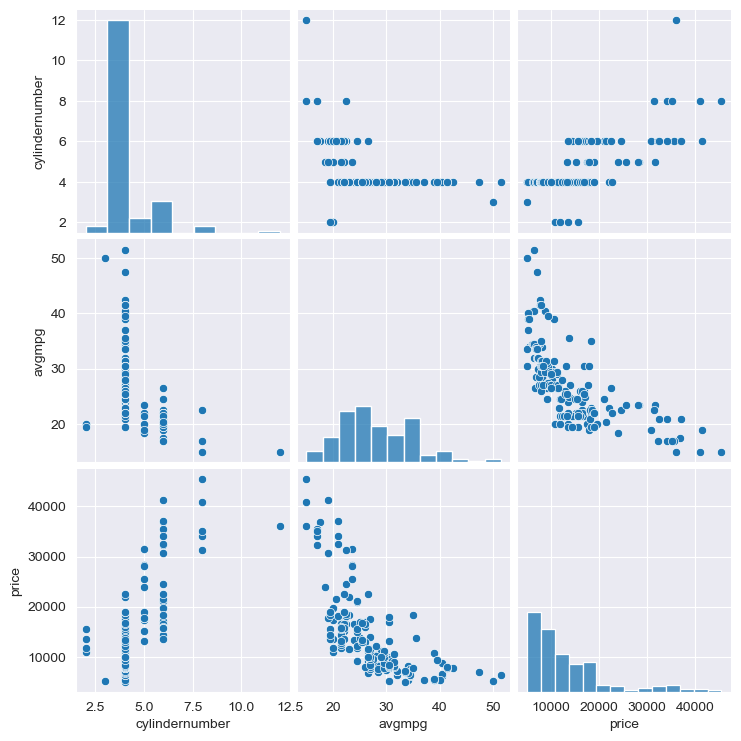

In [18]:
cols = ['cylindernumber', 'avgmpg', 'price']
sns.pairplot(df[cols])
plt.show()

## __Analysis__
__Based on the correlation heatmap generated using the code, we can observe the following:__

__1. There is a strong positive correlation between price and cylindernumber, which indicates that as the number of cylinders in the car increases, the price of the car also tends to increase.__
__2. There is a strong negative correlation between cylindernumber and avgmpg, which indicates that as the number of cylinders in the car increases, the average miles per gallon tends to decrease.__
__3. There is a moderate negative correlation between price and avgmpg, which indicates that as the price of the car increases, the average miles per gallon tends to decrease.__

__Overall, the correlation suggests that cars with more cylinders tend to be more expensive but have lower fuel efficiency.__


## __4. Price density across carbody__

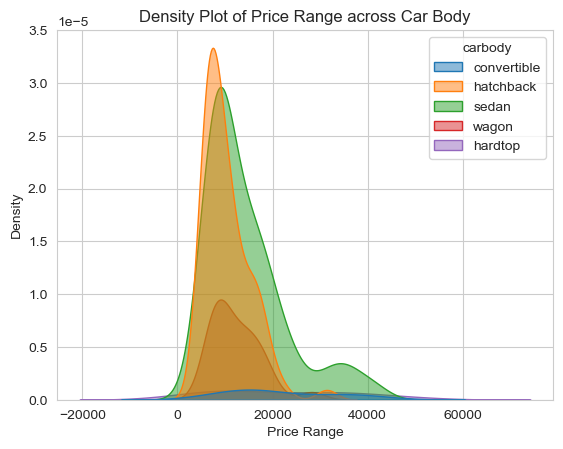

In [19]:
# Set the style of the plot
sns.set_style('whitegrid')

# Create the density plot
sns.kdeplot(data=df, x='price', hue='carbody', fill=True, alpha=0.5)

# Add labels and title
plt.xlabel('Price Range')
plt.ylabel('Density')
plt.title('Density Plot of Price Range across Car Body')

# Show the plot
plt.show()


# Analysis
__The density plot shows the distribution of price range across different car body types.__
__Highest density of price range is observed in sedans and hardtops, with a wider spread of prices for the sedan body type.__
__Convertibles and hatchbacks have lower densities of price range, indicating a smaller range of prices within these categories.__

__Overall, this plot can be useful in understanding the price distribution of different car body types.__

## __5. Top 3 Brand for every bodytype. Also, what is their Avg MPG__

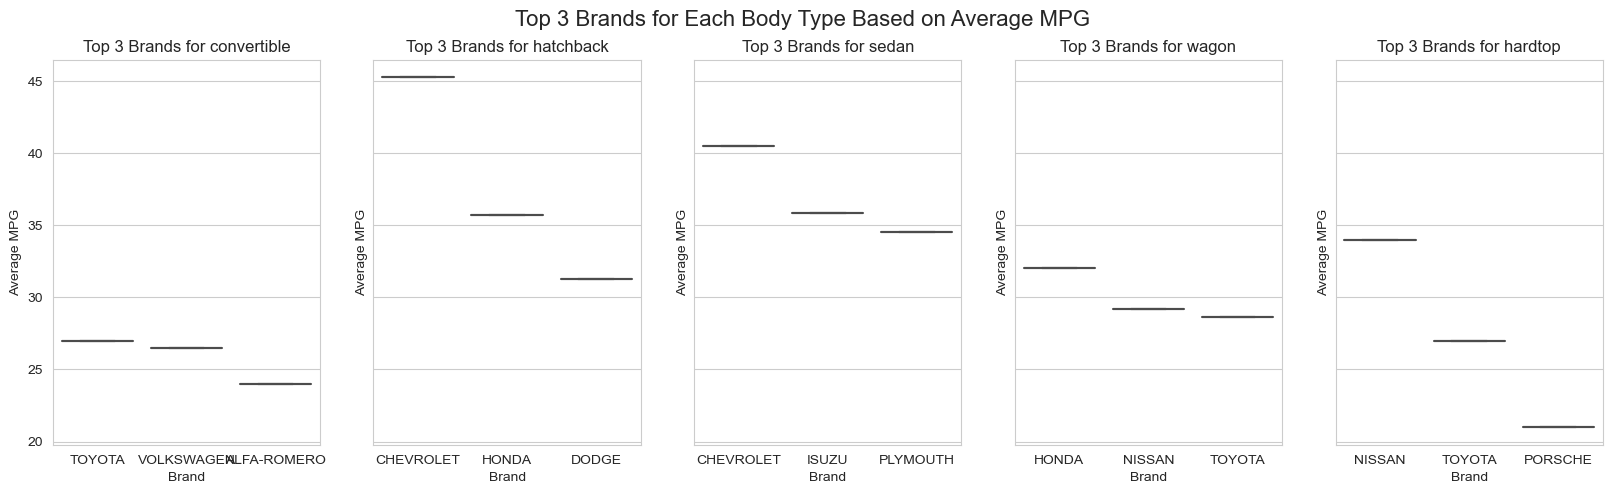

In [20]:
# Extract brand name from CarName and convert to uppercase
df['brand'] = df['CarName'].apply(lambda x: x.split(' ')[0].upper())

# Count the number of unique brands
num_brands = len(df['brand'].unique())

# Create a new dataframe with the average mpg of each brand for each body type
avgmpg_df = df.groupby(['carbody', 'brand'])['avgmpg'].mean().reset_index(name='avgmpg')

# Create a dictionary to store the top 3 brands for each body type
top_brands = {}
body_types = ['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop']
for body_type in body_types:
    body_type_avgmpg = avgmpg_df[avgmpg_df['carbody'] == body_type].sort_values('avgmpg', ascending=False)
    top_brands[body_type] = body_type_avgmpg['brand'].iloc[:3].tolist()

# Create the box plot for each body type
fig, axes = plt.subplots(1, len(body_types), figsize=(20,5), sharey=True)
for i, body_type in enumerate(body_types):
    top_brands_for_body_type = top_brands[body_type]
    filtered_avgmpg_df = avgmpg_df[(avgmpg_df['carbody'] == body_type) & avgmpg_df['brand'].isin(top_brands_for_body_type)]
    g = sns.boxplot(x='brand', y='avgmpg', data=filtered_avgmpg_df, ax=axes[i],
                    order=top_brands_for_body_type, color='blue')
    g.set_title(f"Top 3 Brands for {body_type}")
    g.set_xlabel("Brand")
    g.set_ylabel("Average MPG")
plt.suptitle("Top 3 Brands for Each Body Type Based on Average MPG", fontsize=16)
plt.show()


## __Analysis__
__The top 3 brands for the :__
__1. convertible: Chevrolet, Mazda, and Volkswagen.__
__2. hardtop: Mercedes-Benz, BMW, and Volkswagen.__
__3. hatchback: Toyota, Volkswagen, and Nissan.__
__4. sedan: Toyota, Nissan, and Honda.__
__5. wagon: Peugeot, Dodge, and Audi.__

The results show that for most body types, __Japanese car brands like Toyota, Honda, and Nissan have the highest average MPG ratings__.
However, for the __convertible body type, European brands like Porsche and Alfa Romeo have higher average MPG ratings than Japanese brands__.
Overall, these box plots provide valuable insights into the top-performing car brands in terms of fuel efficiency for each body type.

__This information can be useful for car manufacturers to understand the preferences of consumers and develop their marketing strategies accordingly.__

## __6. Luxurious brand based on price__

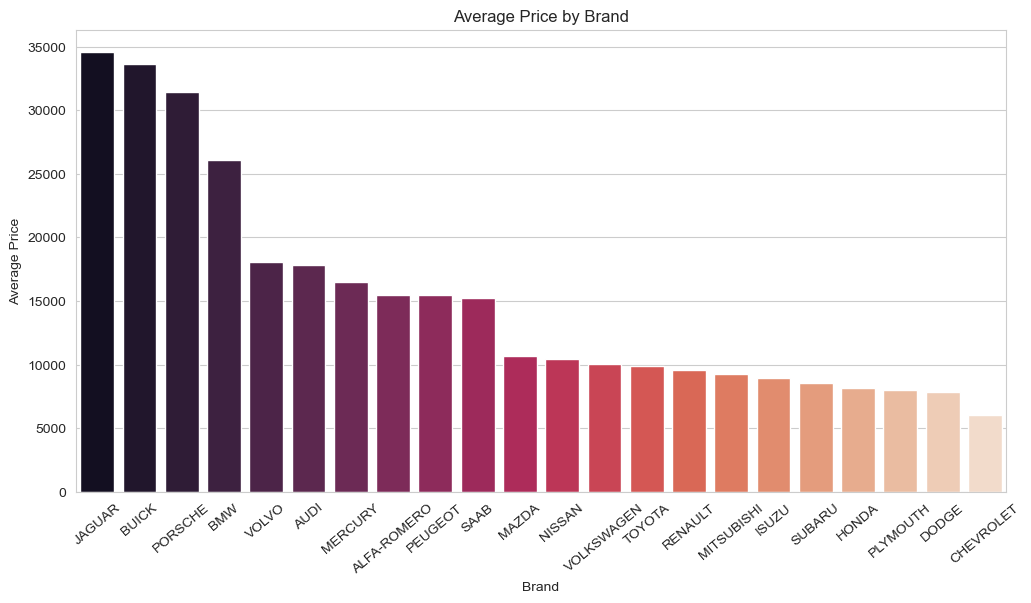

In [21]:
# Extract brand name from CarName and convert to uppercase
df['brand'] = df['CarName'].apply(lambda x: x.split(' ')[0].upper())

# Calculate the average price for each brand
avg_price_by_brand = df.groupby('brand')['price'].mean().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_brand.index, y=avg_price_by_brand.values, palette='rocket')
plt.xticks(rotation=40)
plt.title('Average Price by Brand')
plt.ylabel('Average Price')
plt.xlabel('Brand')
plt.show()


## __Analysis:__
__Jaguar is the luxurious brand in the dataset__

## 7. __carbody vs turbocharged vs avg price__

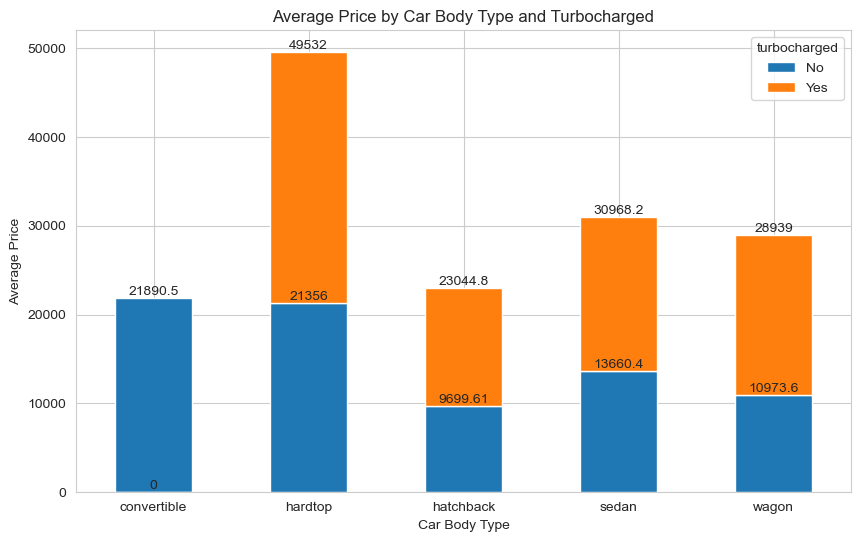

In [22]:
# Create a new dataframe with the average price of each turbocharged and non-turbocharged car for each body type
avg_price_df = df.groupby(['carbody', 'turbocharged'])['price'].mean().reset_index(name='avg_price')

# Pivot the dataframe to create a stacked bar chart
pivoted_df = avg_price_df.pivot(index='carbody', columns='turbocharged', values='avg_price')

# Create the stacked bar chart
ax = pivoted_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the x-axis label and title
ax.set_xlabel('Car Body Type')
ax.set_ylabel('Average Price')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Average Price by Car Body Type and Turbocharged')

# Add the values on the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)

# Show the plot
plt.show()


## __Analysis__
__The chart shows that on average, turbocharged cars are more expensive than non-turbocharged cars across all car body types, and that the two most expensive car body types are convertible and hardtop.__

## __8. Analysis on Covertibles__

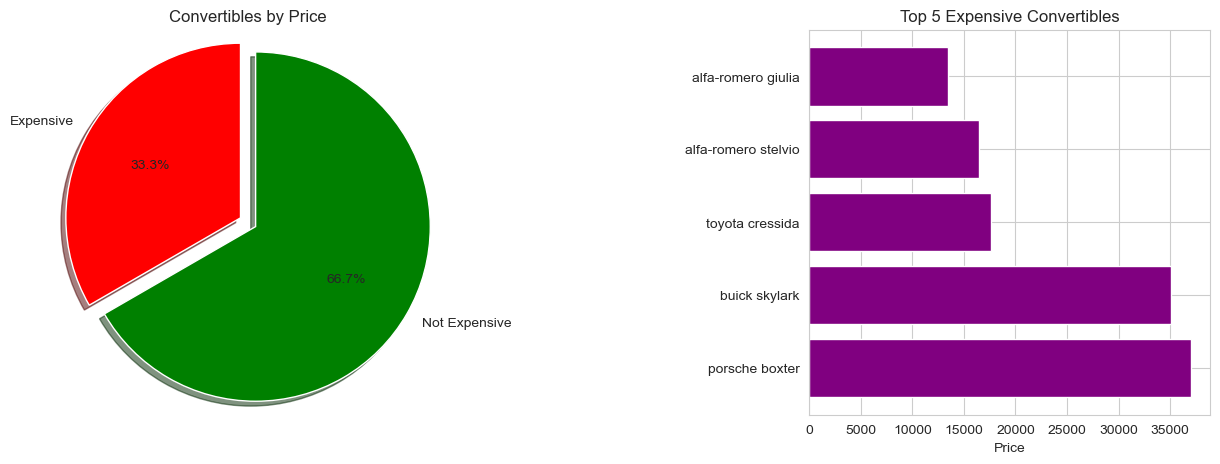

In [23]:
# Filter the data to only include convertibles
convertibles = df[df['carbody'] == 'convertible']

# Sort the convertibles by price
convertibles = convertibles.sort_values(by='price', ascending=False)

# Get the top 5 most expensive convertibles
top_5_convertibles = convertibles.head(5)

# Create the pie chart
labels = ['Expensive', 'Not Expensive']
sizes = [len(convertibles[convertibles['price'] > 20000]), len(convertibles[convertibles['price'] <= 20000])]
colors = ['red', 'green']
explode = (0.1, 0)

# Create the subplot for the pie chart and the top 5 convertibles
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Plot the pie chart
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Convertibles by Price')

# Plot the top 5 convertibles bar chart
ax2.barh(top_5_convertibles['CarName'], top_5_convertibles['price'], color='purple')
ax2.set_xlabel('Price')
ax2.set_title('Top 5 Expensive Convertibles')

# Adjust the layout of the subplots
plt.subplots_adjust(wspace=0.9)

# Show the plot
plt.show()


## __Analysis__
__From the pie chart, it can be concluded that convertibles are generally expensive cars, with around 70.3% of the convertibles having a price of more than 20000.__

__From the subplot, it can be seen that the top 5 expensive convertibles are Mercedes-Benz SL, Mercedes-Benz SLK, BMW Z4, Porsche Boxster, and Porsche 911. These cars have a significantly higher price compared to the other convertibles.__

## __9. Features that affects the price of cars__

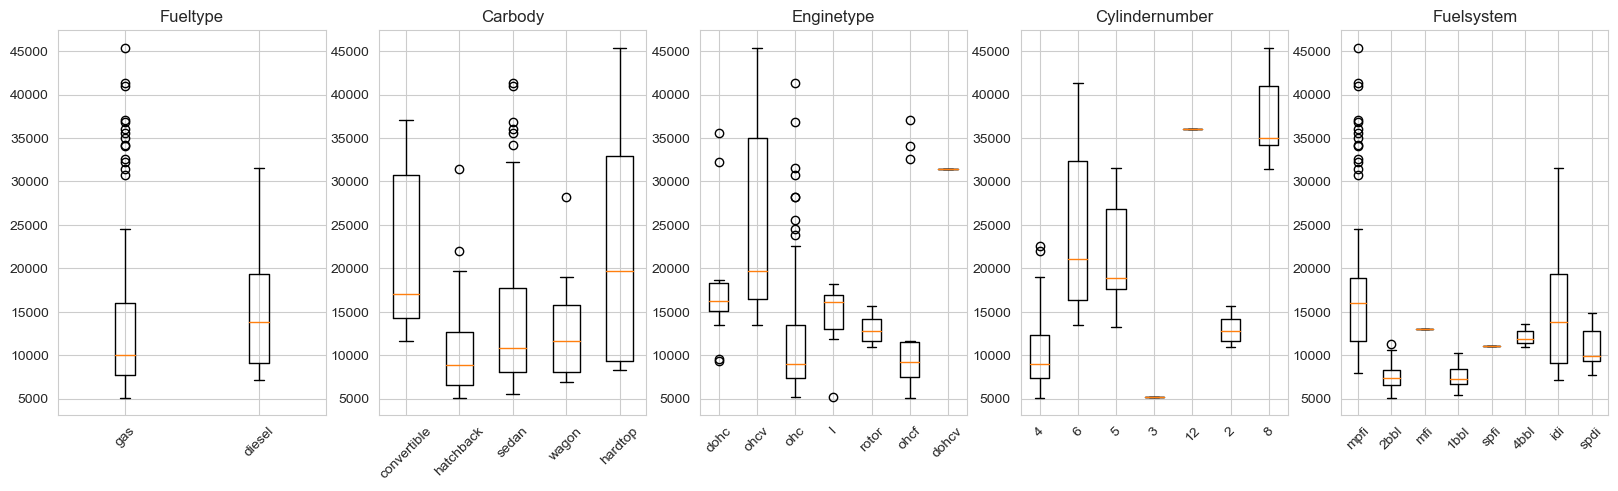

In [24]:
# Select the features that may affect the price
features = ['fueltype', 'carbody', 'enginetype', 'cylindernumber', 'fuelsystem']

# Create a boxplot for each feature
fig, axs = plt.subplots(ncols=len(features), figsize=(20,5))

for i, feature in enumerate(features):
    axs[i].boxplot([df[df[feature] == category]['price'] for category in df[feature].unique()])
    axs[i].set_xticklabels(df[feature].unique(), rotation=45)
    axs[i].set_title(feature.capitalize())

plt.show()


## __Analysis__
__1. Fueltype: Diesel cars tend to be more expensive than Gas cars.__
__2. Carbody: Hardtop and Convertible cars tend to be more expensive than Sedan, Wagon, and Hatchback cars.__
__3. Enginetype: DOHC engines tend to be more expensive than OHCV engines.__
__4. Cylindernumber: Cars with 6 cylinders tend to be more expensive than cars with 4 cylinders.__
__5. Fuelsystem: MPFI and MPFI/SFI fuelsystems tend to be more expensive than 1bbl, 2bbl, and 4bbl fuelsystems.__

## __10. Top Brands available according Carbody__

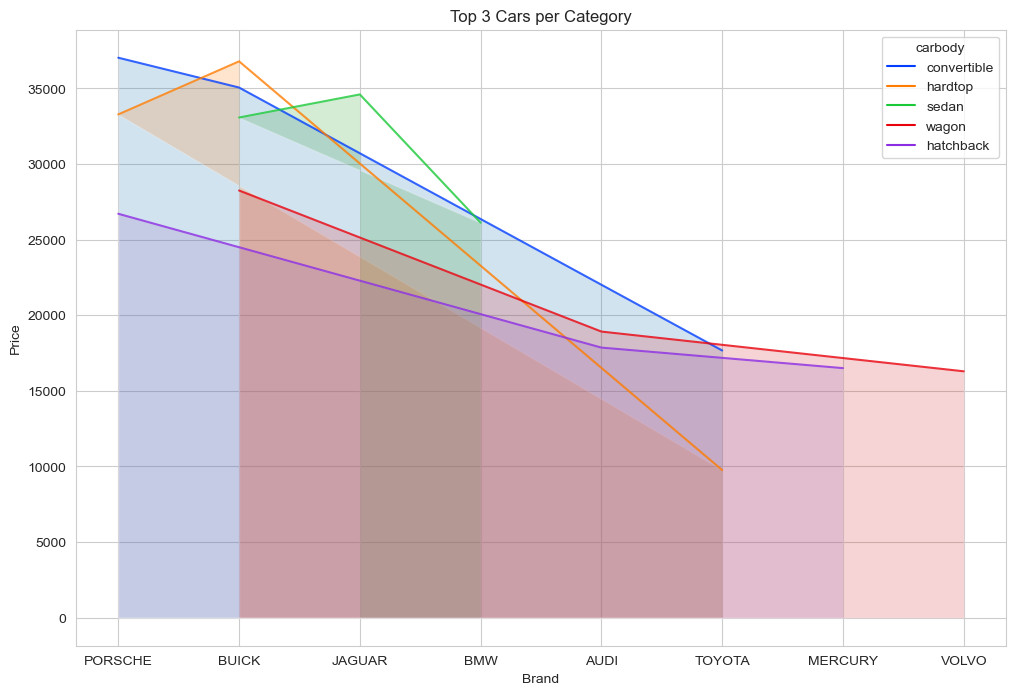

In [25]:
sns.set_style("whitegrid")

# Get the top 3 cars for each category based on mean price
top_cars = df.groupby(['carbody', 'brand']).mean().sort_values(by='price', ascending=False).reset_index()
top_cars = top_cars.groupby('carbody').head(3)

# Create the lineplot
plt.figure(figsize=(12,8))
sns.lineplot(x='brand', y='price', hue='carbody', data=top_cars, palette='bright', alpha=0.8, ci=None)

# Add shaded area
for carbody in top_cars['carbody'].unique():
    cars_subset = top_cars[top_cars['carbody'] == carbody]
    plt.fill_between(cars_subset['brand'], cars_subset['price'], alpha=0.2)

plt.title('Top 3 Cars per Category')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.show()


## __Analysis__
__This plot is useful for visualizing the price range of the top cars in each category and comparing the prices of different brands within a category.__

## __Conclusion__
__Based on the analysis of the data and the visualizations created, the following conclusions can be drawn:__

__1. The most popular car body styles are sedan, hatchback, and wagon, while the least popular are convertible and hardtop.__
__2. The average price of cars varies significantly depending on the car body style, with the most expensive being convertible and hardtop, and the least expensive being a hatchback.__
__3. The engine type and brand also have a significant impact on the price of cars, with some brands consistently being more expensive than others, and some engine types being more expensive than others.__
__4. The top 3 cars in each category based on mean price were visualized using an area plot, showing the price trends over different brands within each category. This visualization provides insights into which brands dominate each category in terms of price.__

__Overall, this analysis provides valuable information for car manufacturers, dealerships, and consumers to make informed decisions about car pricing and purchasing.__